<a href="https://colab.research.google.com/github/manuel222-design/manuel222-design/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
#load dataset
iris=datasets.load_iris()
data=pd.DataFrame(data=np.c_[iris['data'],iris['target']], columns=iris['feature_names']+['target'])

In [3]:
#display info
data.info()
print("\nFirst 5 rows of data:")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB

First 5 rows of data:


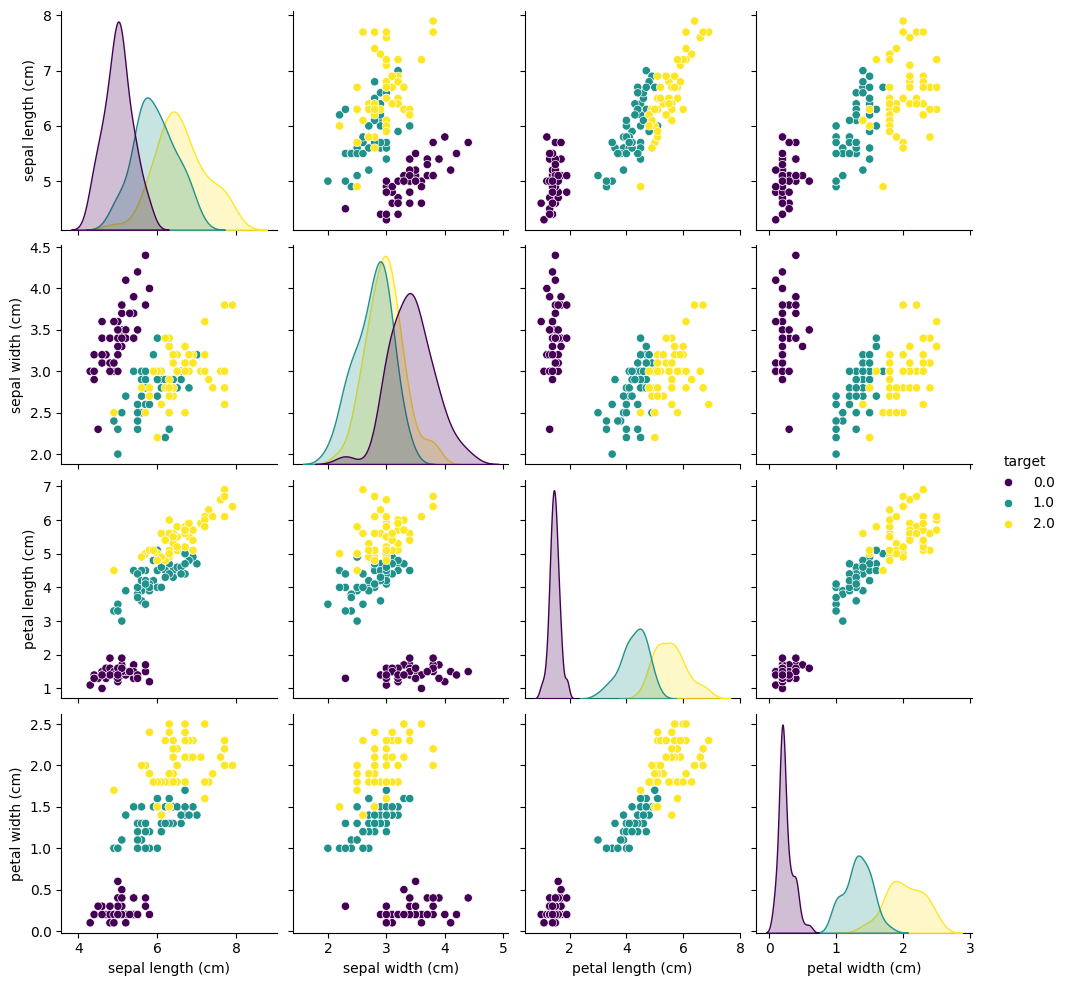

In [4]:
#Exploratory Data Analysis EDA
sns.pairplot(data, hue='target', palette='viridis')
plt.show()

In [5]:
#Splitting Data
x=data.iloc[:,:-1]
y=data.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [6]:
#Standard features
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [7]:
#train svm model
svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(x_train, y_train)

SVC(kernel='linear', random_state=42)

In [8]:
#model evaluation
y_pred=svm_model.predict(x_test)
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9666666666666667
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       1.00      0.89      0.94         9
         2.0       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30

Confusion Matrix:
 [[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]


In [ ]:
# user input for prediction
print("\nEnter feature values for prediction:")
user_input = {}
for feature in iris.feature_names:
    user_input[feature] = float(input(f"{feature}: "))

    #process input and make prediction
user_input = np.array(user_input).reshape(1,-1)
user_input = scaler.transform(user_input)
prediction=svm_model.predict(user_input)
print("\nPredicted Class:", iris.target_names[prediction[0]])


Enter feature values for prediction:
